***Singular Value Decomposition

A = UDV^T

1. U is an orthogonal m×m matrix, its columns are the left-singular vectors of A
2. V is an orthogonal n×n matrix, its columns are the right-singular vectors  of A
3. D is a diagonal m×n matrix, elements along its diagonal are the singular values of A

In [1]:
import numpy as np 

In [2]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [3]:
u, d, VT = np.linalg.svd(A)

In [4]:
u

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [5]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [6]:
d

array([8.66918448, 4.10429538])

In [7]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

D must have the samem dimensions as A for UDV^T matrix multiplication to be possible 

In [8]:
D = np.concatenate((np.diag(d), [[0,0]]), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [9]:
! pip install Pillow as PIL

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [10]:
from PIL import Image

In [11]:
! pip install wget

In [12]:
! python -m wget


usage: wget.py [options] URL

options:
  -o --output FILE|DIR   output filename or directory
  -h --help
  --version



In [13]:
import matplotlib.pyplot as plt

In [14]:
import requests
import shutil

img_url = 'https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg'
path = 'SVD.jpg'
r = requests.get(img_url, stream=True)
if r.status_code == 200:
    with open(path, 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f) 
        print('Image Downloaded Successfully') 


Image Downloaded Successfully


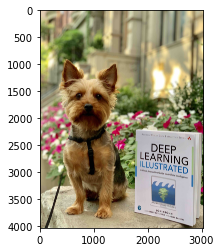

In [15]:
img = Image.open('SVD.jpg')
plt.imshow(img)

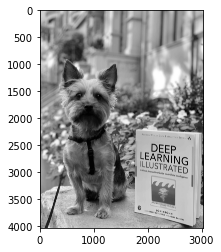

In [16]:
imggray = img.convert('LA')
plt.imshow(imggray)

In [17]:
np.shape('SVD.jpg')

()

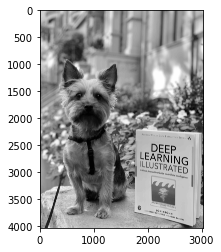

In [18]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.imshow(imgmat, cmap='gray')

In [19]:
U, sigma, V = np.linalg.svd(imgmat)

In [20]:
np.shape(U)

(4032, 4032)

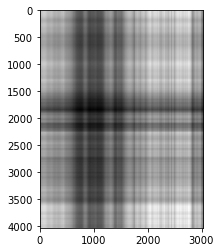

In [21]:
reconstimg = np.matrix(U[:, :1])* np.diag(sigma[:1])* np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray')

Additional singular vectors to improve the image quality

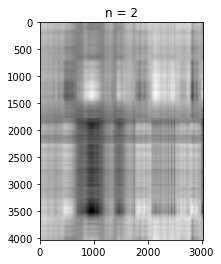

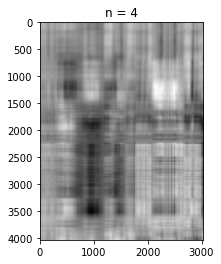

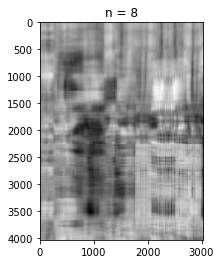

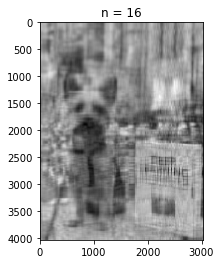

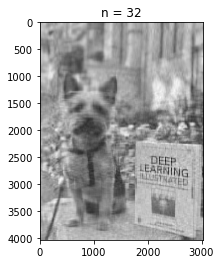

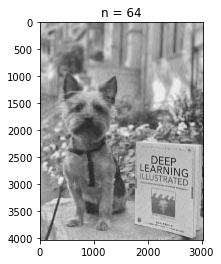

In [22]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg  = np.matrix(U[:, :i])* np.diag(sigma[:i])* np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [23]:
imgmat.shape

(4032, 3024)

In [24]:
full_representation = 4032*3024
full_representation

12192768

In [25]:
svd64_rep = 64*4032 + 64 + 64*3024
svd64_rep

451648

In [26]:
svd64_rep/full_representation

0.037042286050222556

Hence, the image represented as 64 singular vectors is 3.7% of the size of the original